In [4]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.join(os.getcwd(), 'src'))
sys.path.append(os.path.join(os.getcwd()))

# Now you can import normally
import json
import pandas as pd
print("✅ Imports successful!") 

✅ Imports successful!


In [5]:
# Load the development questions
dev_questions = json.load(open('dev.json'))
dev_questions = pd.DataFrame(dev_questions)


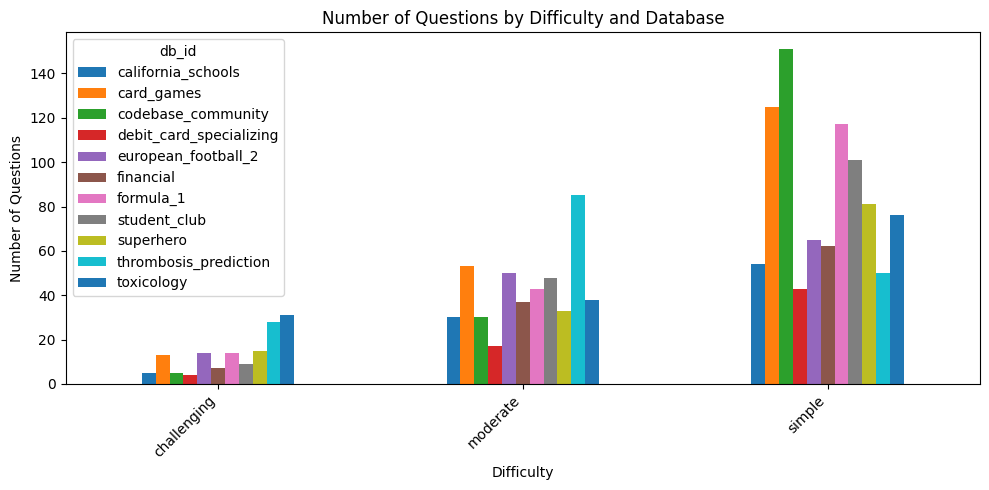

In [6]:

ax = dev_questions.groupby(['difficulty', 'db_id']).size().unstack().plot(
    kind='bar', 
    figsize=(10, 5),
    title='Number of Questions by Difficulty and Database'
)
ax.set_xlabel('Difficulty')
ax.set_ylabel('Number of Questions')
import matplotlib.pyplot as plt
plt.xticks(rotation=45, ha='right')  # Slant x labels
fig = ax.get_figure()
plt.tight_layout()  # Ensure labels and titles fit in the saved image
fig.savefig("difficulty_dbid_barplot.png", dpi=300)


california_schools
financial
ERROR: near "order": syntax error
toxicology

🧱 Table: atom
   🔸 atom_id (TEXT)
   🔸 molecule_id (TEXT)
   🔸 element (TEXT)
   🔗 Foreign Keys:
      molecule_id → molecule.molecule_id

🧱 Table: bond
   🔸 bond_id (TEXT)
   🔸 molecule_id (TEXT)
   🔸 bond_type (TEXT)
   🔗 Foreign Keys:
      molecule_id → molecule.molecule_id

🧱 Table: connected
   🔸 atom_id (TEXT)
   🔸 atom_id2 (TEXT)
   🔸 bond_id (TEXT)
   🔗 Foreign Keys:
      bond_id → bond.bond_id
      atom_id2 → atom.atom_id
      atom_id → atom.atom_id

🧱 Table: molecule
   🔸 molecule_id (TEXT)
   🔸 label (TEXT)
card_games
codebase_community
superhero
formula_1
european_football_2
thrombosis_prediction
student_club
debit_card_specializing


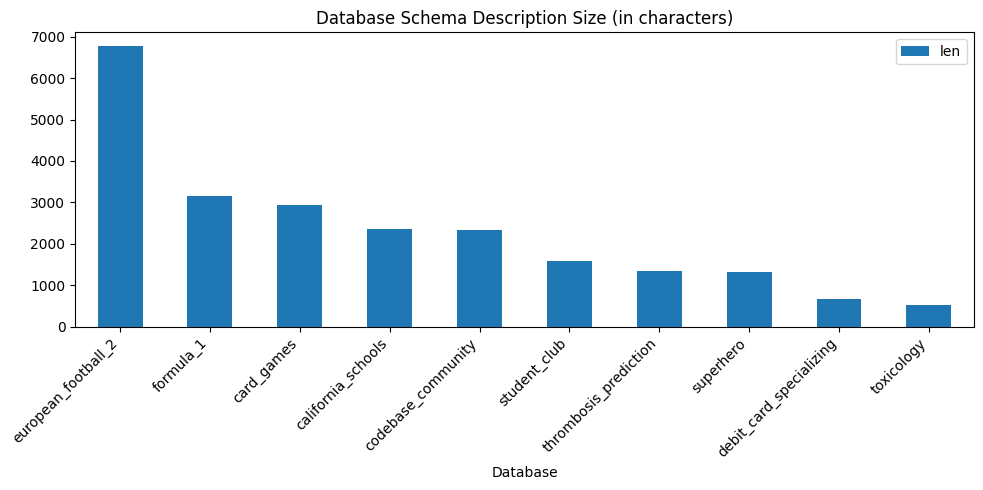

In [7]:
from src.utils import describe_database
import matplotlib.pyplot as plt

db_lens = []
for db in dev_questions['db_id'].unique():
    print(db)
    try:
        db_description = describe_database(f"dbs/dev_databases/{db}/{db}.sqlite")
        db_lens.append({'db': db, 'len': len(db_description)})
        if db == 'toxicology':
            print(db_description)
    except Exception as e:
        print(f'ERROR: {e}')

ax = pd.DataFrame(db_lens).sort_values('len', ascending=False).plot(
    kind='bar', x='db', y='len', figsize=(10, 5), title='Database Schema Description Size (in characters)'
)
ax.set_xlabel('Database')  # Changed x axis label
plt.xticks(rotation=45, ha='right')  # Slant x labels
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("db_size_barplot.png", dpi=300)

In [8]:
# Define the database name
db_name = "european_football_2"

# Get a single example
index = 47
example = dev_questions[dev_questions['db_id'] == db_name].iloc[index].to_dict()

print("Example Question:", example['question'])
print("Example Evidence:")
evidence_items = [e.strip() for e in example['evidence'].split(';') if e.strip()]
for i, ev in enumerate(evidence_items, 1):
    print(f"  {i}. {ev}")
print("")
print("Example SQL:", example['SQL'])
print("Example Difficulty:", example['difficulty'])


Example Question: Which teams have build up play passing more than 70? Please list their short names.
Example Evidence:
  1. build up play passing refers to buildUpPlayPassing
  2. buildUpPlayPassing > 70
  3. short names refers to team_short_name

Example SQL: SELECT DISTINCT t1.team_short_name FROM Team AS t1 INNER JOIN Team_Attributes AS t2 ON t1.team_api_id = t2.team_api_id WHERE t2.buildUpPlayPassing > 70
Example Difficulty: moderate


In [3]:
from src.choosing_generator.models import TextToSQL

t = TextToSQL(
    question=example['question'],
    evidence=example['evidence'],
    expected_sql=example['SQL'],
    difficulty=example['difficulty'],
    db_name=db_name,
    db_path=f"dbs/dev_databases/{db_name}/{db_name}.sqlite"  # Custom path
) 

In [130]:
# Demonstrate cost tracking capabilities
metadata = t.get_metadata()
print(f"\n🔍 Cost Analysis:")

if metadata['actual_cost'] is not None:
    # Use actual cost from API (already in dollars)
    print(f"   💰 Real API cost: ${metadata['actual_cost']:.6f}")
    print(f"   📊 Cost per token: ${metadata['actual_cost'] / metadata['total_tokens']:.8f}")
    
    if metadata['cached_tokens'] and metadata['cached_tokens'] > 0:
        print(f"   🏎️  Savings from cached tokens: {metadata['cached_tokens']} tokens")

# Performance summary
if metadata['latency_seconds'] and metadata['total_tokens']:
    throughput = metadata['total_tokens'] / metadata['latency_seconds']
    print(f"\n⚡ Performance Summary:")
    print(f"   📈 Throughput: {throughput:.1f} tokens/second")
    print(f"   ⏱️  Total latency: {metadata['latency_seconds']:.3f} seconds")
    print(f"   🎯 Model: {metadata['model_name_used']}")


🔍 Cost Analysis:


In [ ]:
a 3d plot of price, latency, and accuracy would be dope af